In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  1 13:36:49 2024

@author: laserglaciers
"""

import os
import pandas as pd
import geopandas as gpd
import numpy as np
# from subProcessUtils import date_sort
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm, colors
import string


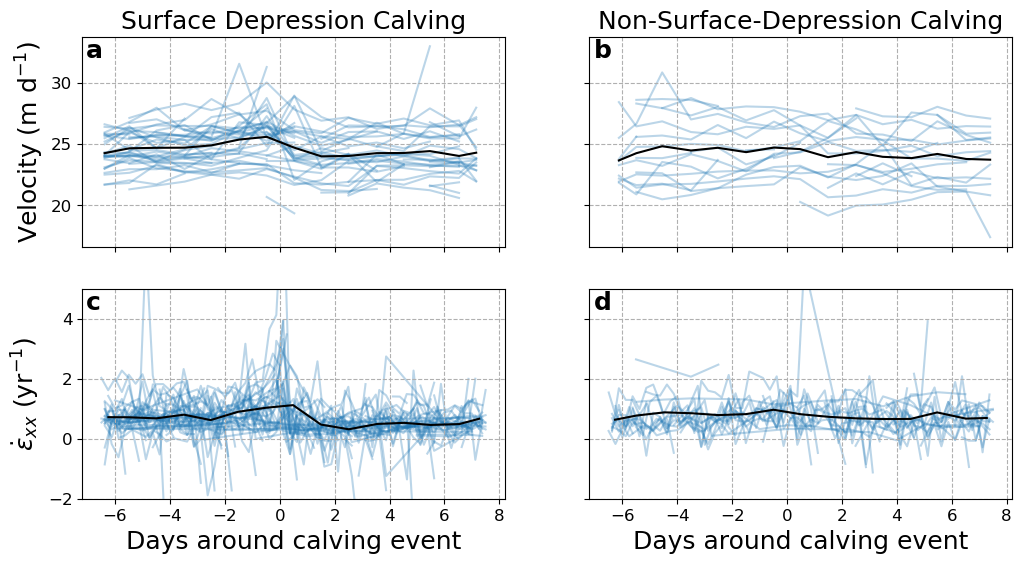

In [2]:
flexure_style_path = '../data/calving_style/flexure_style_calving_vel_groupby_vel_d8_timeshift.pkl'
non_flexure_style_path = '../data/calving_style/non_flexure_style_calving_vel_groupby_vel_d8_timeshift.pkl'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6), sharey='row', sharex='col')
axs = axs.flatten()

flexure_df = pd.read_pickle(flexure_style_path)
non_flexure_df = pd.read_pickle(non_flexure_style_path)
day = pd.Timedelta(1,"D")

#flexure style
for col in flexure_df.iloc[:,1:]:
    axs[0].plot(flexure_df.days_around_calving/day , flexure_df[col].values, '-', markeredgecolor='k',c='tab:blue',
            alpha=0.3, zorder=1,label='Terminus velocity')


flexure_df.rename(columns={0:'days_around_calving'},inplace=True)
gb = flexure_df.groupby(['days'],dropna=True).mean()
flexure_calving_signiture = np.nanmean(gb.iloc[:,1:],axis=1) # I removed the days_around_calving column

axs[0].plot(gb.days_around_calving.values/day, flexure_calving_signiture,'-', markeredgecolor='k', c='k',
        alpha=1,zorder=2,label='Terminus velocity')


for col in non_flexure_df.iloc[:,1:]:
    axs[1].plot(non_flexure_df.days_around_calving/day , non_flexure_df[col].values, '-', markeredgecolor='k',c='tab:blue',
            alpha=0.3, zorder=1,label='Terminus velocity')


non_flexure_df.rename(columns={0:'days_around_calving'},inplace=True)
gb_nf = non_flexure_df.groupby(['days'],dropna=True).mean()
non_flexure_calving_signiture = np.nanmean(gb_nf.iloc[:,1:],axis=1) # I removed the days_around_calving column

axs[1].plot(gb_nf.days_around_calving.values/day, non_flexure_calving_signiture,'-', markeredgecolor='k', c='k',
        alpha=1,zorder=2,label='Terminus velocity')

label_dict = {'fontsize': 18}
labelsize = 12
axs[0].set_title('Surface Depression Calving', **label_dict)
axs[1].set_title('Non-Surface-Depression Calving', **label_dict)

axs[0].grid(linestyle='--')
axs[1].grid(linestyle='--')
axs[0].tick_params(axis='both', labelsize = labelsize)
axs[1].tick_params(axis='both', labelsize = labelsize)

ylabel = r'Velocity (m d$^{-1}$)'
axs[0].set_ylabel(ylabel, **label_dict)


#%% plot exx

flexure_style_path_exx = '/media/laserglaciers/upernavik/flexure_manuscipt/pkls/exx_flexure_style_calving.pkl'
non_flexure_style_path_exx = '/media/laserglaciers/upernavik/flexure_manuscipt/pkls/exx_non-flexure_style_calving.pkl'

flexure_exx_df = pd.read_pickle(flexure_style_path_exx)
non_flexure_exx_df = pd.read_pickle(non_flexure_style_path_exx)

#flexure style
for col in flexure_exx_df.iloc[:,1:-1]:
    axs[2].plot(flexure_exx_df.days_around_calving/day , flexure_exx_df[col].values, '-', markeredgecolor='k',c='tab:blue',
            alpha=0.3, zorder=1,label='exx')


flexure_exx_df.rename(columns={0:'days_around_calving'},inplace=True)
gb = flexure_exx_df.groupby(['days'],dropna=True).mean()
flexure_calving_signiture = np.nanmean(gb.iloc[:,1:],axis=1) # I removed the days_around_calving column

axs[2].plot(gb.days_around_calving.values/day,
            flexure_calving_signiture,'-', markeredgecolor='k', c='k',
        alpha=1,zorder=2,label='exx')


for col in non_flexure_exx_df.iloc[:,1:-1]:
    axs[3].plot(non_flexure_exx_df.days_around_calving/day , non_flexure_exx_df[col].values, '-', markeredgecolor='k',c='tab:blue',
            alpha=0.3, zorder=1,label='exx')


non_flexure_exx_df.rename(columns={0:'days_around_calving'},inplace=True)
gb_nf = non_flexure_exx_df.groupby(['days'],dropna=True).mean()
non_flexure_calving_signiture = np.nanmean(gb_nf.iloc[:,1:],axis=1) # I removed the days_around_calving column

axs[3].plot(gb_nf.days_around_calving.values/day,
            non_flexure_calving_signiture,'-', markeredgecolor='k', c='k',
        alpha=1,zorder=2,label='exx')



axs[2].grid(linestyle='--')
axs[3].grid(linestyle='--')
axs[2].tick_params(axis='both', labelsize = labelsize)
axs[3].tick_params(axis='both', labelsize = labelsize)

epsilon =r'$\dot{\epsilon}_{xx}$ (yr$^{-1}$)'
epsilon_symbol =r'$\dot{\epsilon}_{xx}}$'
axs[2].set_ylabel(epsilon, **label_dict)
axs[2].set_xlabel('Days around calving event', **label_dict)
axs[3].set_xlabel('Days around calving event', **label_dict)

axs[2].set_ylim(-2,5)
axs[3].set_ylim(-2,5)


alphabet = list(string.ascii_lowercase)
text_dict = {'fontsize':18,
             'fontweight': 'bold'}


for i,axis in enumerate(axs):
    text_label = axis.text(.01, .99, alphabet[i], ha='left', va='top', transform=axis.transAxes, **text_dict)